In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#loading dataset
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
#checking null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

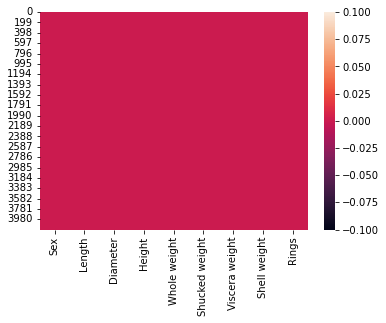

In [6]:
sns.heatmap(df.isnull())
#no null values present

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
#conerting sex 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df['Sex']=le.fit_transform(df['Sex'])

In [11]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
df['Sex'].value_counts()


# f=0,i=1,m=2

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

# EDA

In [13]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Outliers

In [14]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:>

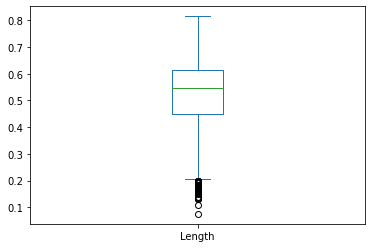

In [15]:
df['Length'].plot.box()
#outliers present at lower limits

<AxesSubplot:>

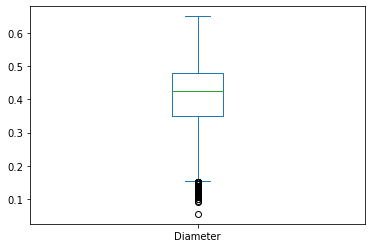

In [16]:
df['Diameter'].plot.box()
#outliers present at lower limits

<AxesSubplot:>

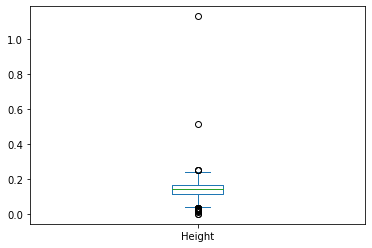

In [17]:
df['Height'].plot.box()
#outliers present at both limits

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

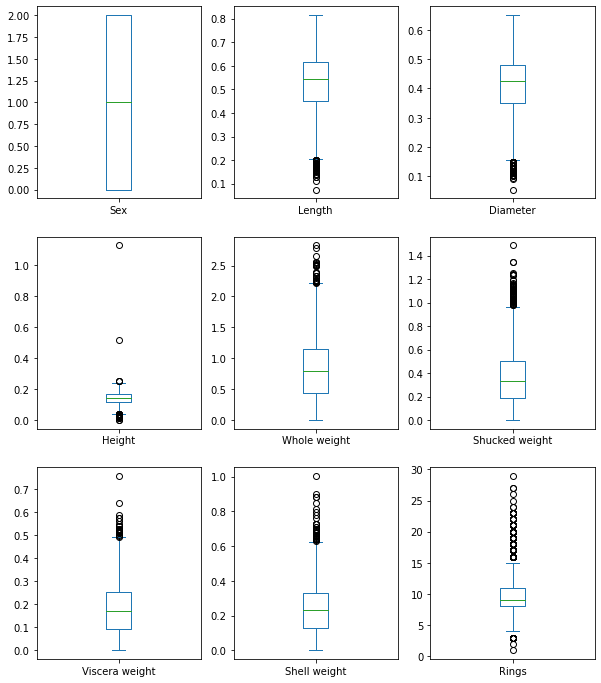

In [18]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,12))

# Skewness

In [19]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

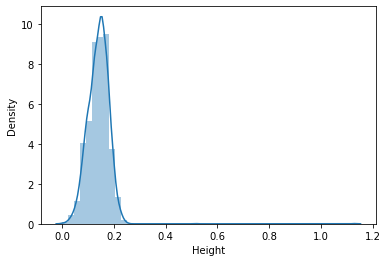

In [20]:
sns.distplot(df['Height'])
#skewness present 

<AxesSubplot:xlabel='Length', ylabel='Density'>

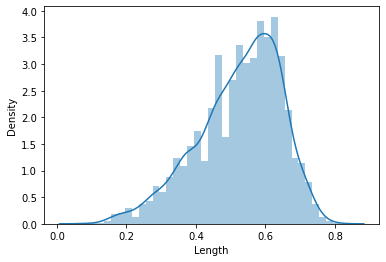

In [21]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

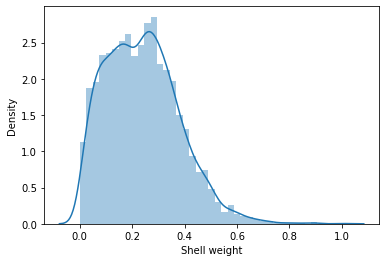

In [22]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

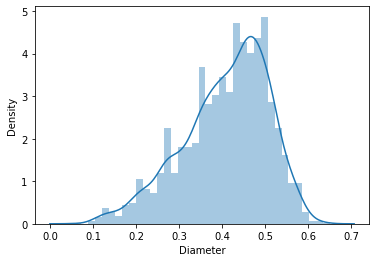

In [23]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

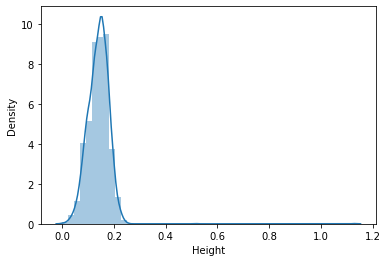

In [24]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

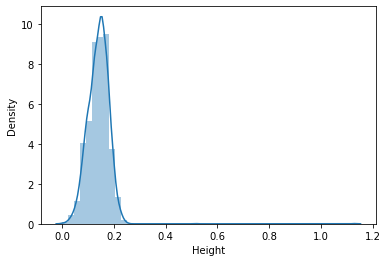

In [25]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

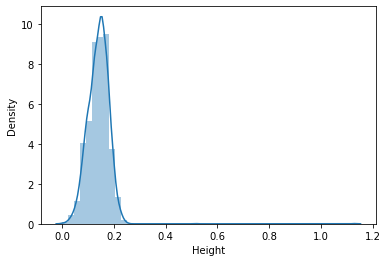

In [26]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

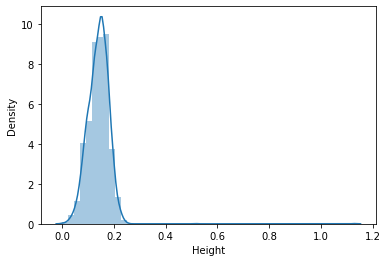

In [27]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

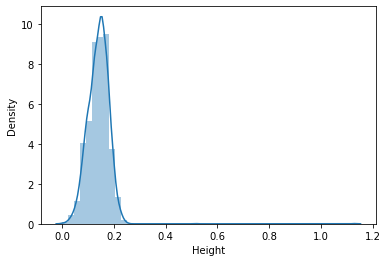

In [28]:
sns.distplot(df['Height'])

In [29]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

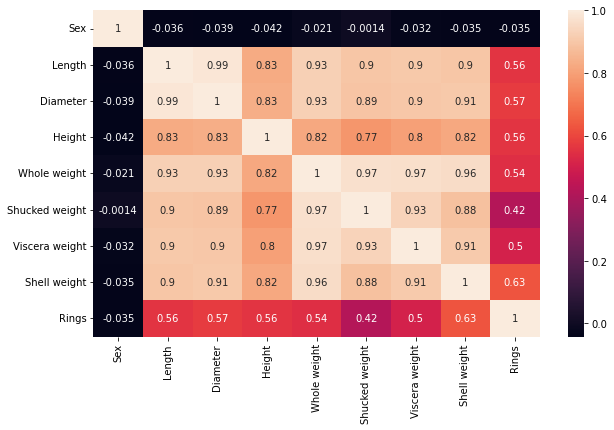

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linecolor='white')

In [31]:
df.drop('Sex',axis=1,inplace=True)

# Outliers treatment

In [32]:
from scipy.stats import zscore

In [33]:
z=np.abs(zscore(df))
z

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013
2,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624
3,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571
4,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [34]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [35]:
z=np.array(z)

In [36]:
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [37]:
z[6][7]

3.12251641377204

### Skewness treatment

In [38]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [39]:
#removing skewness
from scipy.stats import boxcox,yeojohnson

In [40]:
df['Height']=yeojohnson(df['Height'],0)

In [41]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            1.099602
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [42]:
df['Length']=yeojohnson(df['Length'],0)

In [43]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.375006,0.365,0.090754,0.5140,0.2245,0.1010,0.1500,15
1,0.300105,0.265,0.086178,0.2255,0.0995,0.0485,0.0700,7
2,0.425268,0.420,0.126633,0.6770,0.2565,0.1415,0.2100,9
3,0.364643,0.365,0.117783,0.5160,0.2155,0.1140,0.1550,10
4,0.285179,0.255,0.076961,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.447886,0.450,0.152721,0.8870,0.3700,0.2390,0.2490,11
4173,0.463734,0.440,0.126633,0.9660,0.4390,0.2145,0.2605,10
4174,0.470004,0.475,0.186480,1.1760,0.5255,0.2875,0.3080,9
4175,0.485508,0.485,0.139762,1.0945,0.5310,0.2610,0.2960,10


In [44]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.985400,0.860584,0.909361,0.881759,0.887460,0.883906,0.560254
Diameter,0.985400,1.000000,0.867742,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.860584,0.867742,1.000000,0.846682,0.800496,0.825408,0.845189,0.580232
Whole weight,0.909361,0.925452,0.846682,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.881759,0.893162,0.800496,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.887460,0.899724,0.825408,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.883906,0.905330,0.845189,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.560254,0.574660,0.580232,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

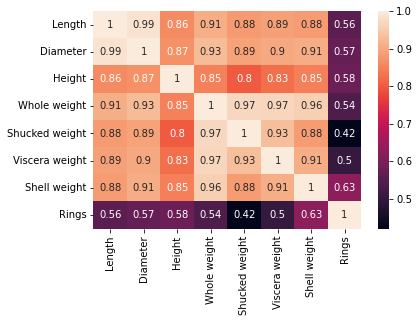

In [45]:
sns.heatmap(df.corr(),annot=True,)

In [46]:
#removing outliers
df1=df[(z<3).all(axis=1)]

In [47]:
df.shape

(4177, 8)

In [48]:
df1.shape

(4027, 8)

In [49]:
df=df1
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.375006,0.365,0.090754,0.5140,0.2245,0.1010,0.1500,15
1,0.300105,0.265,0.086178,0.2255,0.0995,0.0485,0.0700,7
2,0.425268,0.420,0.126633,0.6770,0.2565,0.1415,0.2100,9
3,0.364643,0.365,0.117783,0.5160,0.2155,0.1140,0.1550,10
4,0.285179,0.255,0.076961,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.447886,0.450,0.152721,0.8870,0.3700,0.2390,0.2490,11
4173,0.463734,0.440,0.126633,0.9660,0.4390,0.2145,0.2605,10
4174,0.470004,0.475,0.186480,1.1760,0.5255,0.2875,0.3080,9
4175,0.485508,0.485,0.139762,1.0945,0.5310,0.2610,0.2960,10


In [50]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.375006,0.365,0.090754,0.5140,0.2245,0.1010,0.1500,15
1,0.300105,0.265,0.086178,0.2255,0.0995,0.0485,0.0700,7
2,0.425268,0.420,0.126633,0.6770,0.2565,0.1415,0.2100,9
3,0.364643,0.365,0.117783,0.5160,0.2155,0.1140,0.1550,10
4,0.285179,0.255,0.076961,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.447886,0.450,0.152721,0.8870,0.3700,0.2390,0.2490,11
4173,0.463734,0.440,0.126633,0.9660,0.4390,0.2145,0.2605,10
4174,0.470004,0.475,0.186480,1.1760,0.5255,0.2875,0.3080,9
4175,0.485508,0.485,0.139762,1.0945,0.5310,0.2610,0.2960,10


In [51]:
x=df.iloc[:,0:-1]

In [52]:
y=df.iloc[:,-1]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=44)

In [54]:
x_train.shape

(2698, 7)

In [55]:
x_test.shape

(1329, 7)

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
lr.score(x_train,y_train)

0.5236345623045235

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [72]:
lg=LogisticRegression()
knn=KNeighborsClassifier()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
svc=SVC()

In [73]:
model=[lg,knn,gnb,dtc,svc]

In [76]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    

Accuracy Score of LogisticRegression() is
0.2686230248306998
[[ 0  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 27  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24 49 11  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10 69 21 14  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 42 50 73 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 22 38 99 62 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 18 18 66 75 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 11 40 50 37  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  7 26 32 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  7 15 28 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 13 17  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 10 16  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4  7 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  7  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  2  3  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  2  2  0  0  0  0  0  0  0  0]]
              precis

Accuracy Score of SVC() is
0.28141459744168545
[[ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 26  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 35 39 10  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19 60 27  9  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11 37 71 54 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 21 54 85 58 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 15 28 63 75 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 15 35 46 42  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 12 24 32 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 10 18 28 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4 13 17  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7  6 16  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  3 13  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  8  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  3  3  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  1  2  0  0  0  0  0  0  0  0]]
              precision    recall 